BERTScore (German)

=== BERTScore DE Summary ===
              count      mean       std       min      25%       50%  \
BERTScore_F1   33.0  0.666531  0.054375  0.562372  0.63085  0.666479   

                   75%       max  
BERTScore_F1  0.693696  0.787339  

BERTScore (English)

=== BERTScore EN Summary ===
              count     mean       std      min       25%       50%       75%  \
BERTScore_F1   33.0  0.84471  0.026354  0.79881  0.826283  0.846968  0.857253   

                   max  
BERTScore_F1  0.912463  

BARTScore CNN Model (German)

=== BARTScore CNN DE Summary ===
                      count      mean       std       min       25%       50%  \
BARTScore_paper_avg    33.0 -2.767925  0.399122 -3.831910 -2.981397 -2.749375   
BARTScore_paper_harm   33.0 -1.374948  0.196562 -1.853268 -1.490644 -1.372173   

                           75%       max  
BARTScore_paper_avg  -2.479493 -1.780970  
BARTScore_paper_harm -1.239254 -0.883296  

BARTScore CNN Model (English)

===

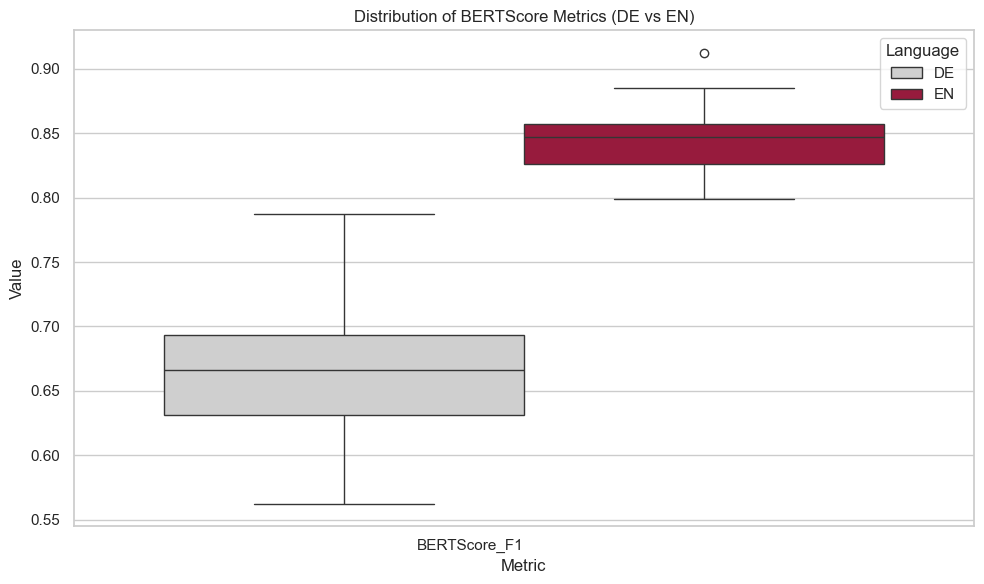

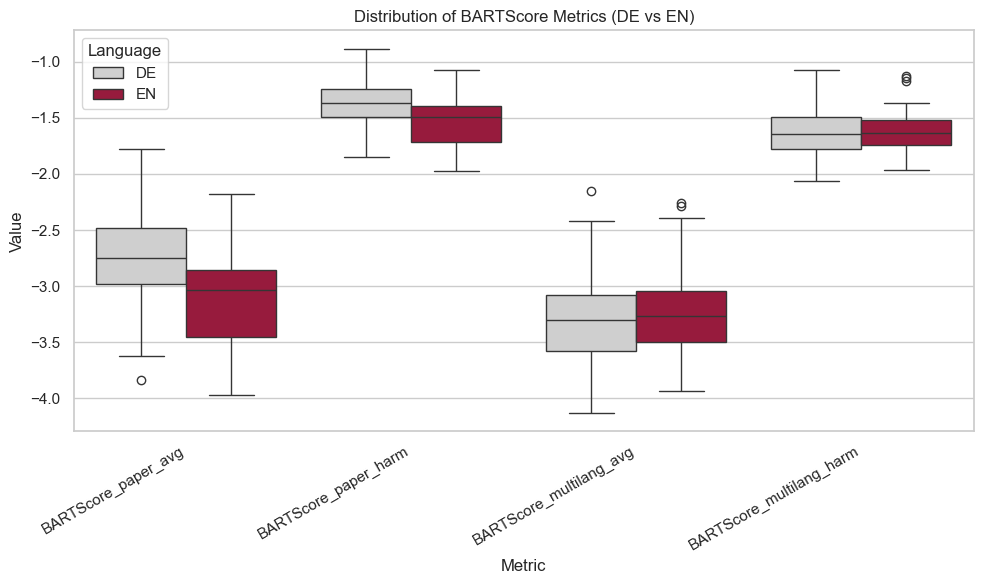

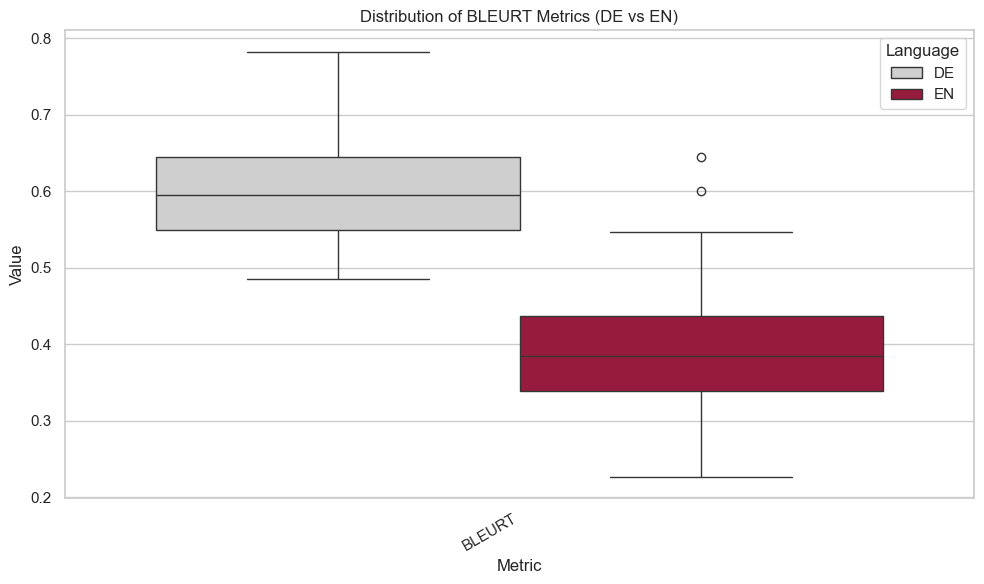

In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------------------------------------------------------
# 1) LOAD AND AGGREGATE BERTscore/BARTScore/BLEURT
# ----------------------------------------------------------------------------

# Paths to BERTScore/BARTScore/BLEURT CSVs
bert_de_path = "../../../data/eval/bertscore_evaluation_de.csv"
bert_en_path = "../../../data/eval/bertscore_evaluation_en.csv"
bart_cnn_de_path = "../../../data/eval/bartscore_cnn_de.csv"
bart_cnn_en_path = "../../../data/eval/bartscore_cnn_en.csv"
bart_multi_de_path = "../../../data/eval/bartscore_multi_de.csv"
bart_multi_en_path = "../../../data/eval/bartscore_multi_en.csv"
bleurt_evaluation_de_path = "../../../data/eval/bleurt_evaluation_de.csv"
bleurt_evaluation_en_path = "../../../data/eval/bleurt_evaluation_en.csv"


# Read the CSVs
bert_de = pd.read_csv(bert_de_path)
bert_en = pd.read_csv(bert_en_path)
bart_cnn_de = pd.read_csv(bart_cnn_de_path)
bart_cnn_en = pd.read_csv(bart_cnn_en_path)
bart_multi_de = pd.read_csv(bart_multi_de_path)
bart_multi_en = pd.read_csv(bart_multi_en_path)
bleurt_de = pd.read_csv(bleurt_evaluation_de_path)
bleurt_en = pd.read_csv(bleurt_evaluation_en_path)

# Columns of interest
bert_col = [
    "BERTScore_F1",
]
bart_cnn_col = [
    "BARTScore_paper_avg",
    "BARTScore_paper_harm",
]
bart_multi_col = [
    "BARTScore_multilang_avg",
    "BARTScore_multilang_harm",
]
bleurt_col = [
    "BLEURT"
]

# --- Compute summary stats for BERTScore (German vs English) ---
def summarize_metrics(df, metric_cols, lang_label):
    summary_df = df[metric_cols].describe().transpose()  # mean, std, min, max, etc.
    print(f"\n=== {lang_label} Summary ===")
    print(summary_df)
    return summary_df

print("BERTScore (German)")
bert_de_summary = summarize_metrics(bert_de, bert_col, lang_label="BERTScore DE")

print("\nBERTScore (English)")
bert_en_summary = summarize_metrics(bert_en, bert_col, lang_label="BERTScore EN")

print("\nBARTScore CNN Model (German)")
bart_cnn_de_summary = summarize_metrics(bart_cnn_de, bart_cnn_col, lang_label="BARTScore CNN DE")

print("\nBARTScore CNN Model (English)")
bart_cnn_en_summary = summarize_metrics(bart_cnn_en, bart_cnn_col, lang_label="BARSTcore CNN EN")

print("\nBARTScore Multi Model (German)")
bart_multi_de_summary = summarize_metrics(bart_multi_de, bart_multi_col, lang_label="BARTScore Multi DE")

print("\nBARTScore Multi Model (English)")
bart_multi_en_summary = summarize_metrics(bart_multi_en, bart_multi_col, lang_label="BARTScore Multi EN")

print("\nBLEURT (German)")
bleurt_de_summary = summarize_metrics(bleurt_de, bleurt_col, lang_label="BLEURT DE")

print("\nBLEURT (English)")
bleurt_en_summary = summarize_metrics(bleurt_en, bleurt_col, lang_label="BLEURT EN")

# ----------------------------------------------------------------------------
# 2) OPTIONAL: DISTRIBUTION PLOTS (EXAMPLE: BOX PLOTS)
# ----------------------------------------------------------------------------

sns.set_theme(style="whitegrid")
palette = {'DE': '#cfcfcf', 'EN': '#ac0634'}


# Merge the data into a single DF for easy plotting: 
# We'll add a 'Language' column and a 'Metric' column
bert_de_long = bert_de.melt(
    id_vars=["question_id_q"],
    value_vars=bert_col,
    var_name="Metric",
    value_name="Value"
)
bert_de_long["Language"] = "DE"

bert_en_long = bert_en.melt(
    id_vars=["question_id_q"],
    value_vars=bert_col,
    var_name="Metric",
    value_name="Value"
)
bert_en_long["Language"] = "EN"

bert_concat = pd.concat([bert_de_long, bert_en_long], ignore_index=True)

plt.figure(figsize=(10,6))
sns.boxplot(data=bert_concat, x="Metric", y="Value", hue="Language", palette=palette)
plt.title("Distribution of BERTScore Metrics (DE vs EN)")
plt.xticks(ha="right")
plt.tight_layout()
plt.show()

# Similarly for BARTScore:
bart_cnn_de_long = bart_cnn_de.melt(
    id_vars=["question_id_q"],
    value_vars=bart_cnn_col,
    var_name="Metric",
    value_name="Value"
)
bart_cnn_de_long["Language"] = "DE"

bart_cnn_en_long = bart_cnn_en.melt(
    id_vars=["question_id_q"],
    value_vars=bart_cnn_col,
    var_name="Metric",
    value_name="Value"
)
bart_cnn_en_long["Language"] = "EN"

bart_multi_de_long = bart_multi_de.melt(
    id_vars=["question_id_q"],
    value_vars=bart_multi_col,
    var_name="Metric",
    value_name="Value"
)
bart_multi_de_long["Language"] = "DE"

bart_multi_en_long = bart_multi_en.melt(
    id_vars=["question_id_q"],
    value_vars=bart_multi_col,
    var_name="Metric",
    value_name="Value"
)
bart_multi_en_long["Language"] = "EN"

bart_concat = pd.concat([bart_cnn_de_long, bart_cnn_en_long, bart_multi_de_long, bart_multi_en_long], ignore_index=True)

plt.figure(figsize=(10,6))
sns.boxplot(data=bart_concat, x="Metric", y="Value", hue="Language", palette=palette)
plt.title("Distribution of BARTScore Metrics (DE vs EN)")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

# BLEURT
bleurt_de_long = bleurt_de.melt(
    id_vars=["question_id_q"],
    value_vars=bleurt_col,
    var_name="Metric",
    value_name="Value"
)
bleurt_de_long["Language"] = "DE"

bleurt_en_long = bleurt_en.melt(
    id_vars=["question_id_q"],
    value_vars=bleurt_col,
    var_name="Metric",
    value_name="Value"
)
bleurt_en_long["Language"] = "EN"

bleurt_concat = pd.concat([bleurt_de_long, bleurt_en_long], ignore_index=True)

plt.figure(figsize=(10,6))
sns.boxplot(data=bleurt_concat, x="Metric", y="Value", hue="Language", palette=palette)
plt.title("Distribution of BLEURT Metrics (DE vs EN)")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


C:\Users\wurch\AppData\Local\Temp\ipykernel_52512\217144518.py:83: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.290' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annot_df.loc[idx, col] = significance_marker_and_bold(r_val, p_val)
C:\Users\wurch\AppData\Local\Temp\ipykernel_52512\217144518.py:83: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '$\bf{0.504**}$' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annot_df.loc[idx, col] = significance_marker_and_bold(r_val, p_val)
C:\Users\wurch\AppData\Local\Temp\ipykernel_52512\217144518.py:83: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '$\bf{0.388*}$' has dtype incompatible with float64, please explicitly c

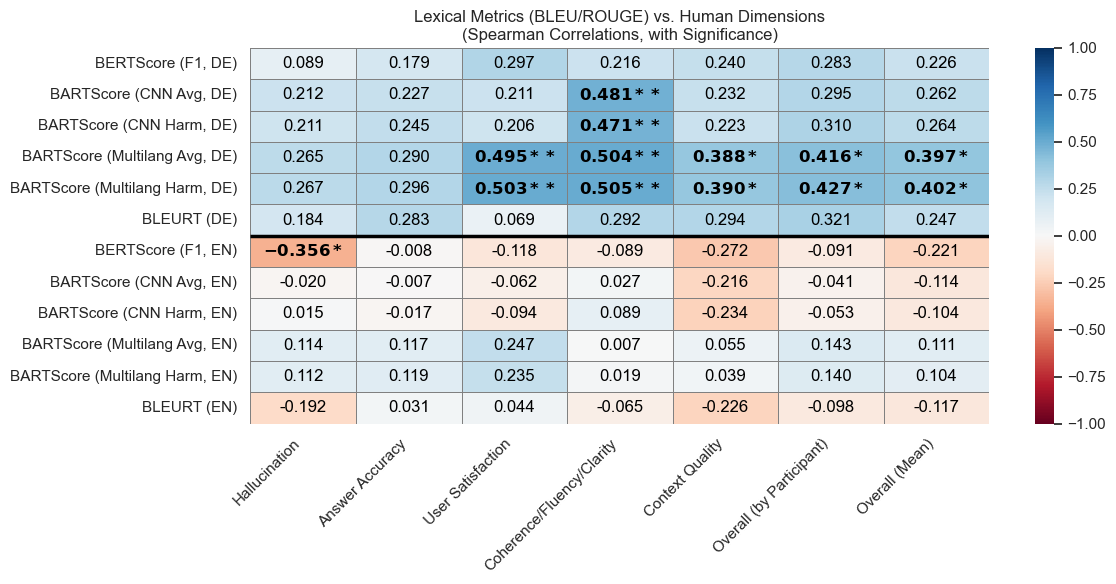


Pivoted table of Spearman correlations (semantic metrics vs. human columns):


human_column,Hallucination,Answer Accuracy,User Satisfaction,Coherence/Fluency/Clarity,Context Quality,Overall (by Participant),Overall (Mean)
"BERTScore (F1, DE)",0.089,0.179,0.297,0.216,0.240,0.283,0.226
"BARTScore (CNN Avg, DE)",0.212,0.227,0.211,$\bf{0.481**}$,0.232,0.295,0.262
"BARTScore (CNN Harm, DE)",0.211,0.245,0.206,$\bf{0.471**}$,0.223,0.310,0.264
"BARTScore (Multilang Avg, DE)",0.265,0.290,$\bf{0.495**}$,$\bf{0.504**}$,$\bf{0.388*}$,$\bf{0.416*}$,$\bf{0.397*}$
"BARTScore (Multilang Harm, DE)",0.267,0.296,$\bf{0.503**}$,$\bf{0.505**}$,$\bf{0.390*}$,$\bf{0.427*}$,$\bf{0.402*}$
BLEURT (DE),0.184,0.283,0.069,0.292,0.294,0.321,0.247
"BERTScore (F1, EN)",$\bf{-0.356*}$,-0.008,-0.118,-0.089,-0.272,-0.091,-0.221
"BARTScore (CNN Avg, EN)",-0.020,-0.007,-0.062,0.027,-0.216,-0.041,-0.114
"BARTScore (CNN Harm, EN)",0.015,-0.017,-0.094,0.089,-0.234,-0.053,-0.104
"BARTScore (Multilang Avg, EN)",0.114,0.117,0.247,0.007,0.055,0.143,0.111


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------[ 1. LOAD & FILTER DATA ]-------------------
corr_path = "../../../data/eval/correlation/correlation_splits_filtered_llm.csv"
df_corr = pd.read_csv(corr_path)

lexical_files = [
    "bertscore_evaluation_de.csv",
    "bertscore_evaluation_en.csv",
    "bartscore_cnn_de.csv",
    "bartscore_cnn_en.csv",
    "bartscore_multi_de.csv",
    "bartscore_multi_en.csv",
    "bleurt_evaluation_de.csv",
    "bleurt_evaluation_en.csv"
]
df_lex = df_corr[df_corr["metric_file"].isin(lexical_files)].copy()

key_human_dims = [
    "avg_hallucination", "avg_answer_acc", "avg_user_sat",
    "avg_coherence", "avg_context_qual", "avg_overall", "overall_mean"
]
df_lex = df_lex[df_lex["human_column"].isin(key_human_dims)]


# ------------------[ 2. PIVOT CORRELATION & P-VALUES ]-------------------
pivot_corr = df_lex.pivot_table(
    index=["metric_column","language"], 
    columns="human_column",
    values="spearman_corr"
)
pivot_pval = df_lex.pivot_table(
    index=["metric_column","language"], 
    columns="human_column",
    values="p_value"
)


# ------------------[ 3. SIGNIFICANCE FUNCTION ]-------------------
def significance_marker_and_bold(r_val, p_val):
    if p_val < 0.001:
        stars = "***"
    elif p_val < 0.01:
        stars = "**"
    elif p_val < 0.05:
        stars = "*"
    else:
        stars = ""
    base_val_str = f"{r_val:.3f}{stars}"
    if p_val < 0.05:
        # LaTeX style bold
        return f"$\\bf{{{base_val_str}}}$"
    else:
        return base_val_str
    
    
# def significance_marker_and_bold(r_val, p_val):
#     if p_val < 0.001:
#         stars = "***"
#     elif p_val < 0.01:
#         stars = "**"
#     elif p_val < 0.05:
#         stars = "*"
#     else:
#         stars = ""
#     base_val_str = f"{r_val:.3f}{stars}"
#     if p_val < 0.05:
#         # LaTeX style bold
#         return f"{base_val_str}, p={p_val:.3f}"
#     else:
#         return f"{base_val_str}, p={p_val:.3f}"


# ------------------[ 4. CREATE ANNOTATION DATAFRAME ]-------------------
annot_df = pivot_corr.copy()

for idx in pivot_corr.index:
    for col in pivot_corr.columns:
        r_val = pivot_corr.loc[idx, col]
        p_val = pivot_pval.loc[idx, col]
        annot_df.loc[idx, col] = significance_marker_and_bold(r_val, p_val)


# ------------------[ 5. RENAME COLUMNS TO USER-FRIENDLY ]-------------------
col_renames = {
    "avg_hallucination": "Hallucination",
    "avg_answer_acc": "Answer Accuracy",
    "avg_user_sat": "User Satisfaction",
    "avg_coherence": "Coherence/Fluency/Clarity",
    "avg_context_qual": "Context Quality",
    "avg_overall": "Overall (by Participant)",
    "overall_mean": "Overall (Mean)"
}
pivot_corr.rename(columns=col_renames, inplace=True)
annot_df.rename(columns=col_renames, inplace=True)


# ------------------[ 6. CREATE ROW LABELS ]-------------------
new_index_labels = []
for (metric_col, lang) in pivot_corr.index:
    new_index_labels.append(f"{metric_col}|{lang}")

pivot_corr.index = new_index_labels
annot_df.index   = new_index_labels

row_renames = {
    'BERTScore_F1|de': 'BERTScore (F1, DE)',
    'BARTScore_paper_avg|de': 'BARTScore (CNN Avg, DE)',
    'BARTScore_paper_harm|de': 'BARTScore (CNN Harm, DE)',
    'BARTScore_multilang_avg|de': 'BARTScore (Multilang Avg, DE)',
    'BARTScore_multilang_harm|de': 'BARTScore (Multilang Harm, DE)',
    'BLEURT|de': 'BLEURT (DE)',
    'BERTScore_F1|en': 'BERTScore (F1, EN)',
    'BARTScore_paper_avg|en': 'BARTScore (CNN Avg, EN)',
    'BARTScore_paper_harm|en': 'BARTScore (CNN Harm, EN)',
    'BARTScore_multilang_avg|en': 'BARTScore (Multilang Avg, EN)',
    'BARTScore_multilang_harm|en': 'BARTScore (Multilang Harm, EN)',
    'BLEURT|en': 'BLEURT (EN)'
}
pivot_corr.rename(index=row_renames, inplace=True)
annot_df.rename(index=row_renames, inplace=True)


#------------------[ 7. DEFINE DESIRED ROW ORDER & COLUMN ORDER ]-------------------
# Row order:
row_order = list(row_renames.values())

# Column order:
col_order = [
    "Hallucination",
    "Answer Accuracy",
    "User Satisfaction",
    "Coherence/Fluency/Clarity",
    "Context Quality",
    "Overall (by Participant)",
    "Overall (Mean)"
]

# Reindex pivot_corr and annot_df with these custom orders
pivot_corr = pivot_corr.reindex(index=row_order, columns=col_order)
annot_df   = annot_df.reindex(index=row_order, columns=col_order)


#------------------[ 8. PLOT THE HEATMAP ]-------------------
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

ax = sns.heatmap(
    data=pivot_corr.astype(float), 
    annot=annot_df,       # annotated text with significance
    fmt="",
    cmap="RdBu",
    center=0,
    vmin=-1, vmax=1,
    linewidths=0.5,
    linecolor="gray",
    annot_kws={"color": "black"}  # Set text color to black
)
# Add a line to separate German and English rows
split_index = len([row for row in row_order if 'DE' in row])  # Count German rows
ax.hlines(
    y=split_index,        # Position of the split line
    xmin=0, xmax=len(col_order),  # Across the entire width of the heatmap
    color="black", linewidth=2.5  # Thicker line
)

ax.set_title("Lexical Metrics (BLEU/ROUGE) vs. Human Dimensions\n(Spearman Correlations, with Significance)")
ax.set_xlabel('')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("../../../data/figures/semantic/heatmap_semantic_metrics.png")
plt.show()
print("\nPivoted table of Spearman correlations (semantic metrics vs. human columns):")
annot_df